# Fake coin example (classification)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### (1) Define generation parameters

In [2]:
# Nominal coin mass (H0)

m0 = 50

# Fake coin mass  (H1)

m1 = 45

# Fraction of fake coins 

fh1 = 0.05

# Measurement resolution

sig = 1

# PDFs for two hypothesis

def h0fun(x):
    
    pdf = norm.pdf(x, loc=m0, scale=sig)
    
    return pdf

def h1fun(x):
    
    pdf = norm.pdf(x, loc=m1, scale=sig)
    
    return pdf

# Signal to background ratio

def s2bfun(x):
    
    s2b = h1fun(x)/h0fun(x)
    
    return s2b

# Signal vs background discriminator function

def yfun(x):
    
    y = (h0fun(x)-h1fun(x))/(h0fun(x)+h1fun(x))
    
    return y



### (2) Generate events

In [3]:
# Number of measurements to generate 

Nevt = 100000

# Generate two hypothesis

xgen0 = np.random.normal(m0,sig,size=Nevt)
xgen1 = np.random.normal(m1,sig,size=Nevt)

# Uniform distributed numbers
rgen = np.random.uniform(size=Nevt)

# Mix of two hypothesis

xtab = (rgen>fh1)*xgen0 + (rgen<=fh1)*xgen1


In [4]:
outfile = "12_fake_cont_data_"+str(Nevt)+'_'+str(m0-m1)+"_"+str(sig)+".dat"

# Store data to file

xtab.tofile(outfile," ","%8.3f")


### (3) Plot generated data

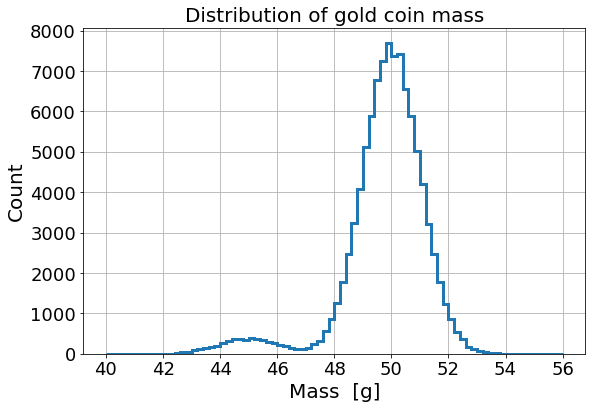

In [5]:
# Histogram range

Nbin = 80

xmin = 40.
xmax = 56.

plt.figure(figsize=(9, 6))

plt.hist(xtab,range=[xmin,xmax],bins=Nbin,log=False, histtype='step',linewidth=3)

plt.title('Distribution of gold coin mass',size=20)
plt.ylabel('Count',size=20)
plt.xlabel('Mass  [g]',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '12_fake_coin_hist_'+str(m0-m1)+'_'+str(sig)+'.png'
plt.savefig(fname)

### (4) Plot discriminator function

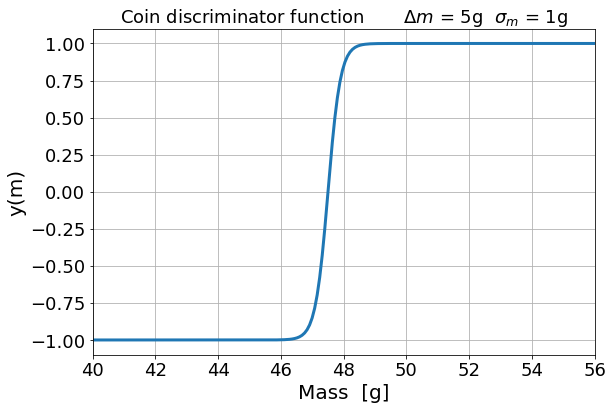

In [6]:
Ny = 200

xvec = np.linspace(xmin,xmax,Ny)
yvec = yfun(xvec)

plt.figure(figsize=(9, 6))

plt.plot(xvec,yvec,'-', linewidth=3)
plt.xlim([xmin,xmax])
plt.title("Coin discriminator function       $\Delta m$ = "+str(m0-m1)+'g  $\sigma_m$ = '+str(sig)+"g",size=18)
plt.ylabel('y(m)',size=20)
plt.xlabel('Mass  [g]',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '12_fake_coin_fun_'+str(m0-m1)+'_'+str(sig)+'.png'
plt.savefig(fname)

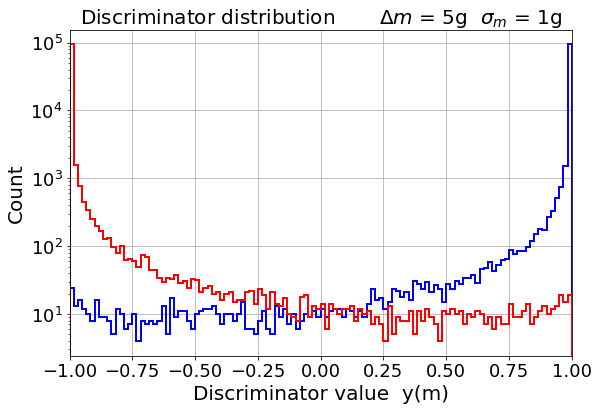

In [7]:
# Discriminator function distributions for two hypothesis

dgood = yfun(xgen0)
dfake = yfun(xgen1)

Ndec=120

ymin = -1.0
ymax = 1.0

plt.figure(figsize=(9, 6))

plt.hist(dgood,range=[ymin,ymax],bins=Ndec,log=True, histtype='step',linewidth=2,color='blue')
plt.hist(dfake,range=[ymin,ymax],bins=Ndec,log=True, histtype='step',linewidth=2,color='red')
plt.xlim([ymin,ymax])

plt.title('Discriminator distribution       $\Delta m$ = '+str(m0-m1)+'g  $\sigma_m$ = '+str(sig)+"g",size=20)
plt.ylabel('Count',size=20)
plt.xlabel('Discriminator value  y(m)',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '12_fake_coin_disc_'+str(m0-m1)+'_'+str(sig)+'.png'
plt.savefig(fname)

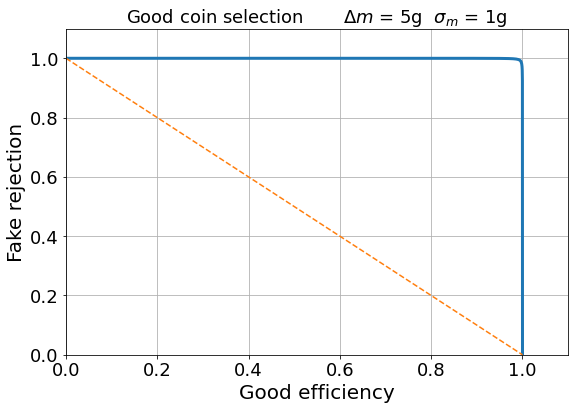

In [8]:
# ROC calculation
# Use same point grid as for y(m) plot

pgood = norm.sf(xvec, loc=m0, scale=sig)     # Survival function: probability of getting value higher than x for good coins (efficiency)
pfake = norm.cdf(xvec, loc=m1, scale=sig)    # Cumulative distribution function: probability of getting value lower than x for fake coins (rejection)

plt.figure(figsize=(9, 6))

plt.plot(pgood,pfake,'-',linewidth=3)
plt.xlim([0.,1.1])
plt.ylim([0.,1.1])

plt.title("Good coin selection       $\Delta m$ = "+str(m0-m1)+'g  $\sigma_m$ = '+str(sig)+"g",size=18)
plt.ylabel('Fake rejection',size=20)
plt.xlabel('Good efficiency',size=20)

# Random choice line

plt.plot([0.,1.],[1.,0.],'--')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '12_fake_coin_roc_'+str(m0-m1)+'_'+str(sig)+'.png'
plt.savefig(fname)

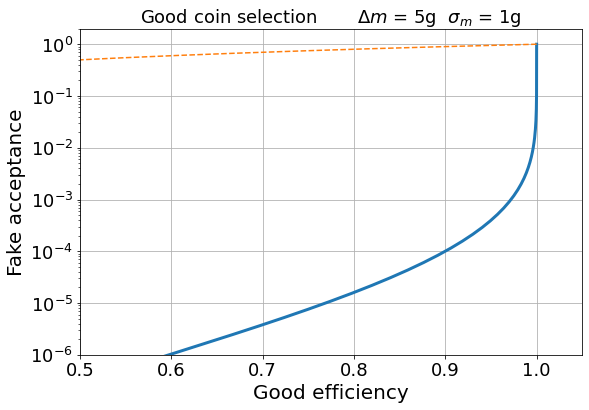

In [9]:
# Different plotting of ROC

plt.figure(figsize=(9, 6))

plt.semilogy(pgood,1.-pfake,'-',linewidth=3)

plt.xlim([0.5,1.05])
plt.ylim([1e-6,2])

plt.title("Good coin selection       $\Delta m$ = "+str(m0-m1)+'g  $\sigma_m$ = '+str(sig)+"g",size=18)
plt.ylabel('Fake acceptance',size=20)
plt.xlabel('Good efficiency',size=20)

# Random choice (for reference)

plt.plot(pgood,pgood,'--')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '12_fake_coin_roc2_'+str(m0-m1)+'_'+str(sig)+'.png'
plt.savefig(fname)